# LAB6 - Whole Process Classification -- Breast Cancer Data

The aim of this lab is to go through the whole process of a classification problem.

Steps:
- Data loading and exploration
- Data Preparation if needed
- Modeling, including, data splitting, hyper-parameter tuning, using different ML algo (KNN, DT, NB, SVM)
- Evaluation


## Importer les librairies

In [1]:
# numpy pour les calculs
import numpy as np


# pandas pour les data structure et data frames
import pandas as pd

# Import matplotlib pour la visualisation
import matplotlib.pyplot as plt

from sklearn import datasets

# scikit-learn metrics module for our models' evaluations
from sklearn import metrics

## Binary Classification Task: Breast Cancer Wisconsin Data 

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.keys())
print(data.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

In [3]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['tumor_type'] = data.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Visualiser les données.

Pour des raisons de simplicité, on visualise les classes par rapport à deux caratérsiques seulement.


On visualise les classes par rapport aux deux caractéristiques 'petal length (cm)' et 'petal width (cm)'

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'tumor_type'],
      dtype='object')

Check if dataset is blanced or not that is to check if both the class label are partially equal or not 

tumor_type
1    357
0    212
Name: count, dtype: int64


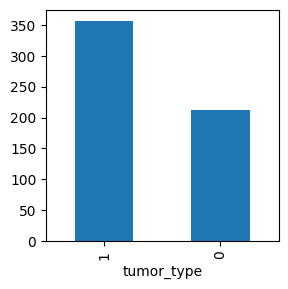

In [12]:
df.tumor_type.value_counts().plot(kind = 'bar',figsize=(3, 3))
print(df.tumor_type.value_counts())

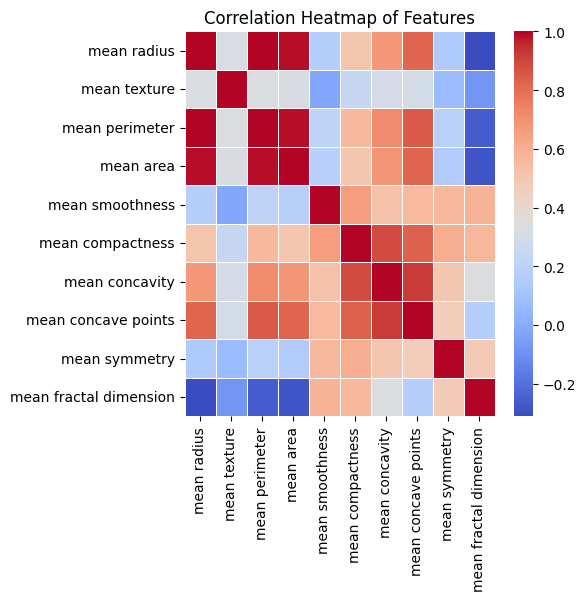

In [9]:
import seaborn as sns
plt.figure(figsize=(5, 5))
mean_features=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']
sns.heatmap(df[mean_features].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [10]:
# Set the correlation threshold
correlation_threshold = 0.85

# Initialize an empty set to keep track of features to drop
to_drop = set()
corr_matrix = df[mean_features].corr().abs()
n=len(corr_matrix.columns)
# Iterate over the correlation matrix
for i in range(n):
    for j in range(i+1, n):  # Only look at pairs once
        if corr_matrix.iloc[i, j] > correlation_threshold:
            # Add the feature with the higher correlation to the drop list
            colname = corr_matrix.columns[j]
            to_drop.add(colname)

# Drop the highly correlated features
print(to_drop)
reduced_df = df.drop(columns=to_drop)

print("Selected Features after Filtering Highly Correlated Ones:")
print(reduced_df.columns)


{'mean concave points', 'mean area', 'mean concavity', 'mean perimeter'}
Selected Features after Filtering Highly Correlated Ones:
Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'tumor_type'],
      dtype='object')


hmmmmm

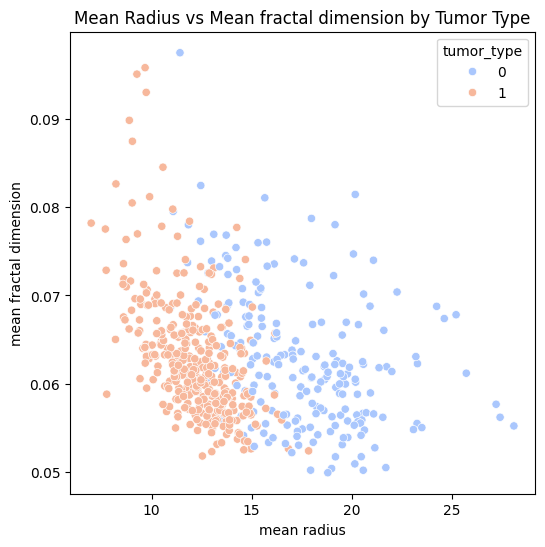

In [11]:
# Plot pairs of features by class
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='mean radius', y='mean fractal dimension', hue='tumor_type', palette="coolwarm")
plt.title("Mean Radius vs Mean fractal dimension by Tumor Type")
plt.show()
 

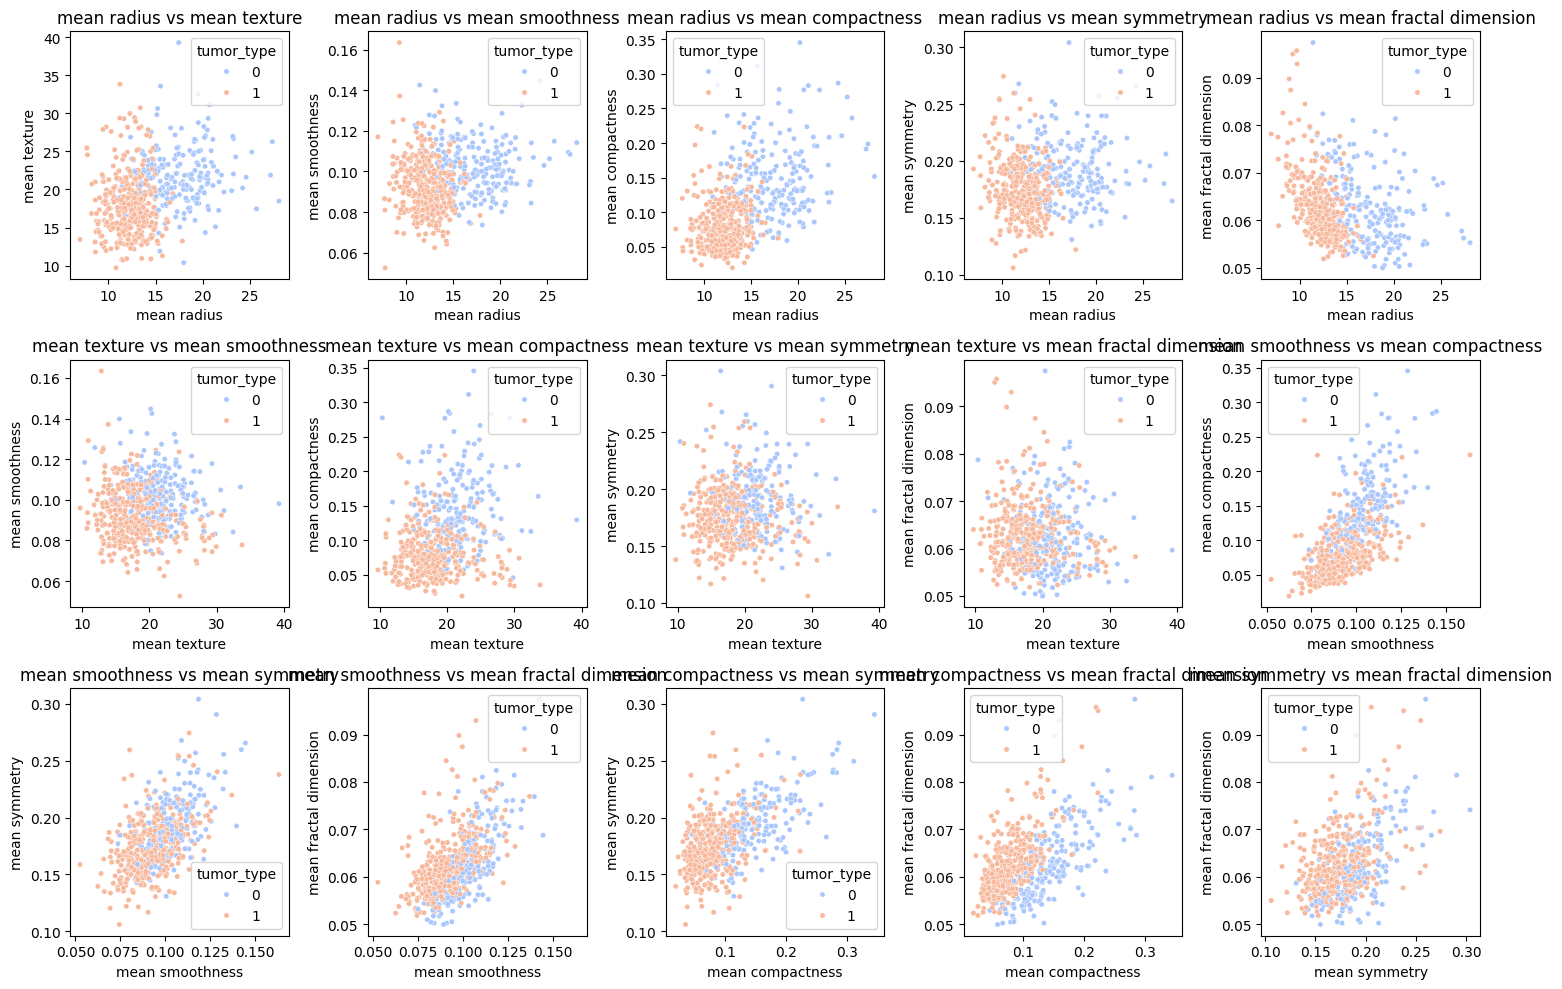

In [12]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Choose your 6 selected features (update with your chosen features)
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 
                     'mean compactness', 'mean symmetry', 'mean fractal dimension']

# Plot all unique pairs of features
plt.figure(figsize=(15, 10))
for i, (feat1, feat2) in enumerate(itertools.combinations(selected_features, 2), 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='tumor_type', palette="coolwarm", s=15)
    plt.title(f"{feat1} vs {feat2}")

plt.tight_layout()
plt.show()


LINEAR KERNEL

it seems that:

Radius and Mean Texture: Perform well for classification.
Radius and Smoothness: Also effective for distinguishing tumor types.
Texture vs. Any Other Feature (besides Radius): Doesn’t seem as helpful.
Smoothness and Fractal Dimension: Shows promise for classification.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define selected features and target
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean fractal dimension']
X = df[features]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=10)  # Try 'linear' or 'rbf' kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9186046511627907

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.91      0.96      0.94        54

    accuracy                           0.92        86
   macro avg       0.92      0.90      0.91        86
weighted avg       0.92      0.92      0.92        86


Confusion Matrix:
 [[27  5]
 [ 2 52]]


RBF KERNEL

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define selected features and target
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean fractal dimension']
X = df[features]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=10)  # Try 'linear' or 'rbf' kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9069767441860465

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.93      0.93      0.93        54

    accuracy                           0.91        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.91      0.91      0.91        86


Confusion Matrix:
 [[28  4]
 [ 4 50]]


Looks like Kernel linear is suitable more than RBF

### Testons SVM avec d'autres valeurs de C pour comparer (100 , 1, 0.1)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define selected features and target
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean fractal dimension']
X = df[features]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=100)  # Try 'linear' or 'rbf' kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9069767441860465

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.93      0.93      0.93        54

    accuracy                           0.91        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.91      0.91      0.91        86


Confusion Matrix:
 [[28  4]
 [ 4 50]]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


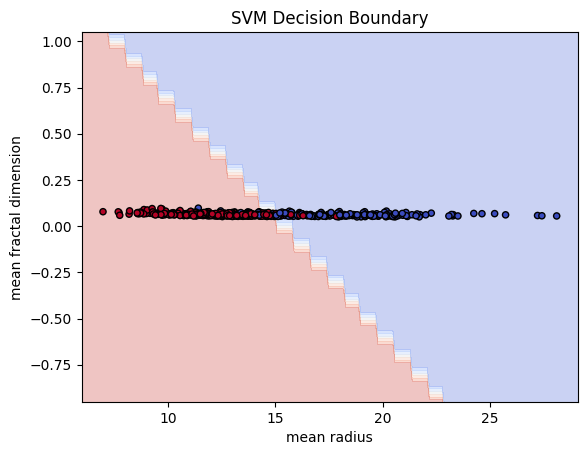

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Select two features
features_2d = ['mean radius', 'mean fractal dimension']
X_2d = df[features_2d]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', C=10)
svm_model.fit(X_train, y_train)

# Set up a grid for plotting decision boundaries
x_min, x_max = X_2d[features_2d[0]].min() - 1, X_2d[features_2d[0]].max() + 1
y_min, y_max = X_2d[features_2d[1]].min() - 1, X_2d[features_2d[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid to show decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot of the data
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_2d[features_2d[0]], X_2d[features_2d[1]], c=y, cmap="coolwarm", edgecolor='k', s=20)
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title("SVM Decision Boundary")
plt.show()


ONLY good one

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


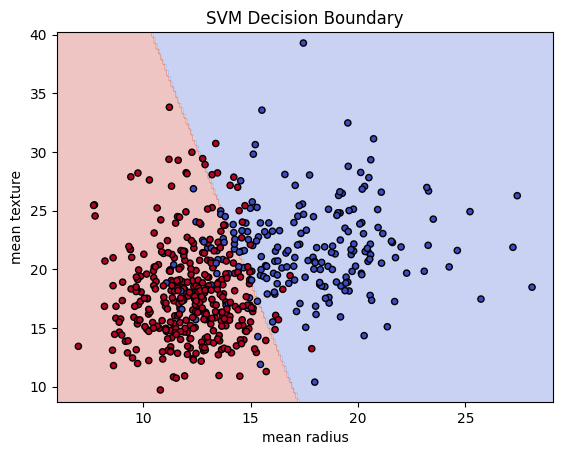

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Select two features
features_2d = ['mean radius', 'mean texture']
X_2d = df[features_2d]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Set up a grid for plotting decision boundaries
x_min, x_max = X_2d[features_2d[0]].min() - 1, X_2d[features_2d[0]].max() + 1
y_min, y_max = X_2d[features_2d[1]].min() - 1, X_2d[features_2d[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid to show decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot of the data
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_2d[features_2d[0]], X_2d[features_2d[1]], c=y, cmap="coolwarm", edgecolor='k', s=20)
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title("SVM Decision Boundary")
plt.show()


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


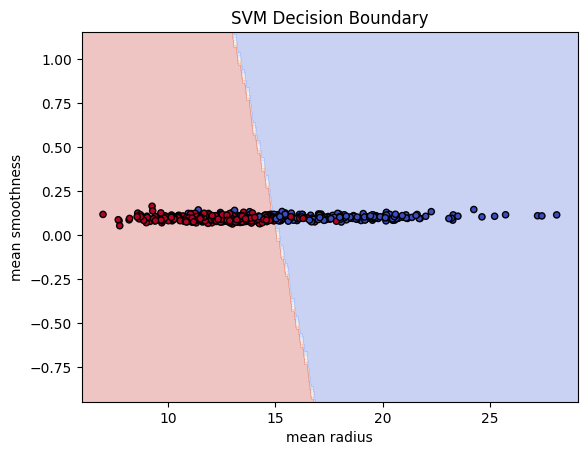

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Select two features
features_2d = ['mean radius', 'mean smoothness']
X_2d = df[features_2d]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Set up a grid for plotting decision boundaries
x_min, x_max = X_2d[features_2d[0]].min() - 1, X_2d[features_2d[0]].max() + 1
y_min, y_max = X_2d[features_2d[1]].min() - 1, X_2d[features_2d[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid to show decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot of the data
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_2d[features_2d[0]], X_2d[features_2d[1]], c=y, cmap="coolwarm", edgecolor='k', s=20)
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title("SVM Decision Boundary")
plt.show()


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


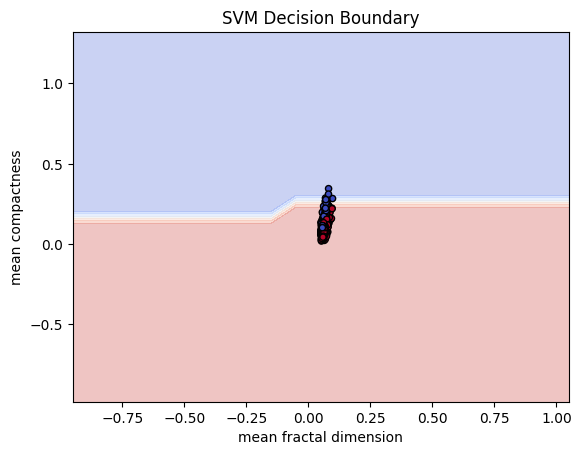

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Select two features
features_2d = ['mean fractal dimension', 'mean compactness']
X_2d = df[features_2d]
y = df['tumor_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Set up a grid for plotting decision boundaries
x_min, x_max = X_2d[features_2d[0]].min() - 1, X_2d[features_2d[0]].max() + 1
y_min, y_max = X_2d[features_2d[1]].min() - 1, X_2d[features_2d[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid to show decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot of the data
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_2d[features_2d[0]], X_2d[features_2d[1]], c=y, cmap="coolwarm", edgecolor='k', s=20)
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title("SVM Decision Boundary")
plt.show()
